In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from src.data_processors import merge_data
from scripts.outlier_removal import plot_outliers_by_zscore,remove_outliers_zscore
from scripts.time_series_analysis import plot_time
from scripts.cleaning_analysis import plot_cleaning
from scripts.load_data import load_csv_file
from scripts.correlation_analysis import cor_solar_raditation_and_temprature, cor_solar_raditation_and_wind_coditions
from scripts.wind_analysis import wind_direction_and_speed_analysis
from scripts.temprature_analysis import relative_humidity_and_temprature_analysis
from scripts.histogram_analysis import histogram_analysis
from scripts.bubble_chart_analysis import bubble_chart_analysis
from scripts.remove_empty_values_with_mean import replace_empty_with_mean

In [3]:
files = {
    'benin-malanville.csv': 'Benin',
    'sierraleone-bumbuna.csv': 'Sierra Leone',
    'togo-dapaong_qc.csv': 'Togo'
}
output_filename = 'merged_data.csv'
preprocessed_data = load_csv_file('togo-dapaong_qc.csv')
#preprocessed_data = merge_data(files, country_map=files, output_filename=output_filename)
print("Preprocessed Data Preview:")
print(preprocessed_data.head(10))  # 

Attempting to load file at: /workspaces/solar-farm-insights/data/togo-dapaong_qc.csv
Preprocessed Data Preview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5  2021-10-25 00:06 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6  2021-10-25 00:07 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7  2021-10-25 00:08 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8  2021-10-25 00:09 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9  2021-10-25 00:10 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TM

In [4]:
numeric_columns = preprocessed_data.select_dtypes(include=['int64', 'float64']).dropna(axis=1, how='all').columns
print(numeric_columns)
summary_stats = preprocessed_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns:")
print(summary_stats)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')
Summary Statistics for Numeric Columns:
               GHI         DNI         DHI        ModA        ModB       Tamb  \
mean    236.385408  226.627336   84.831976  255.078668  246.040213  27.177431   
median   -1.500000    0.000000    0.000000    0.400000    0.400000  26.600000   
std     323.187417  307.836598  112.592274  345.792539  333.983553   5.216108   

               RH        WS    WSgust   WSstdev          WD   WDstdev  \
mean    34.996092  2.226743  2.978942  0.510259  109.331825  9.245667   
median  28.200000  2.100000  2.600000  0.500000   80.800000  9.100000   
std     21.158801  1.397271  1.795337  0.249776   81.104365  5.856843   

                BP  Cleaning  Precipitation      TModA      TModB  
mean    976.245859  0.000351       0.000069  30.930934  31.904767  
median  976.00

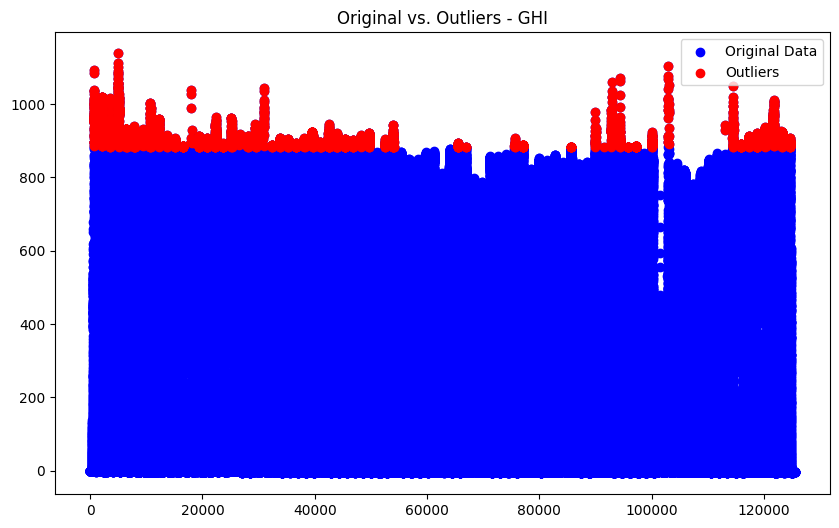

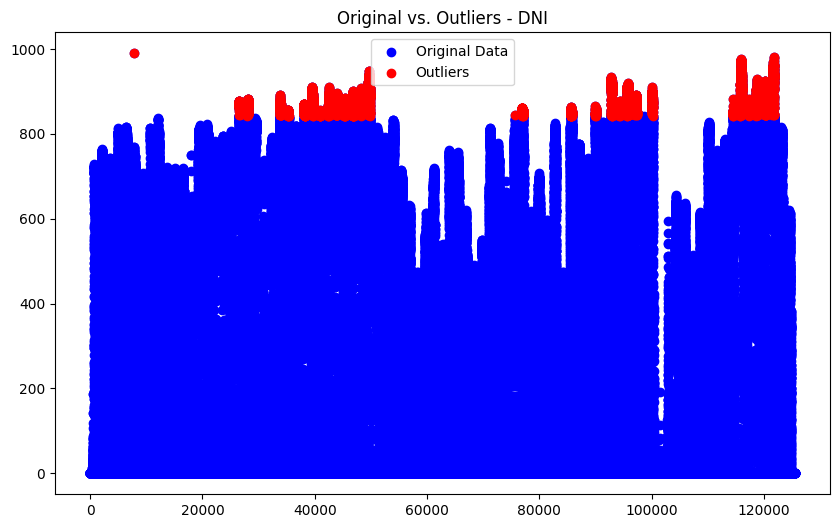

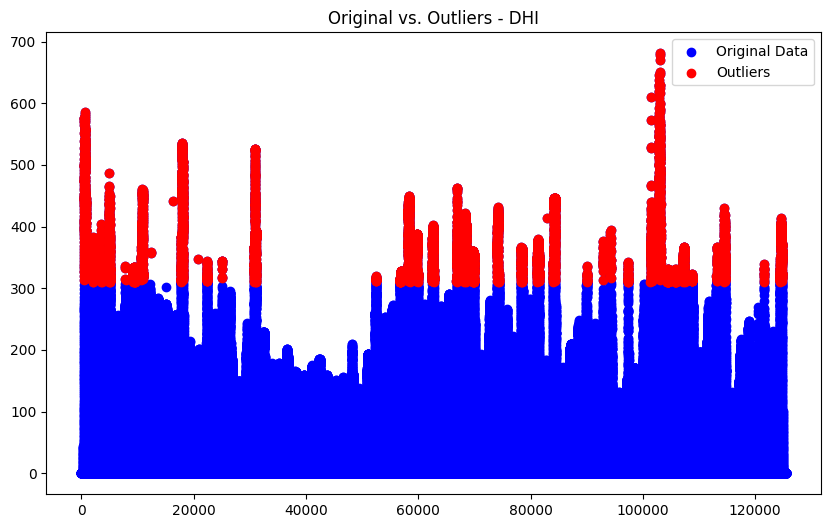

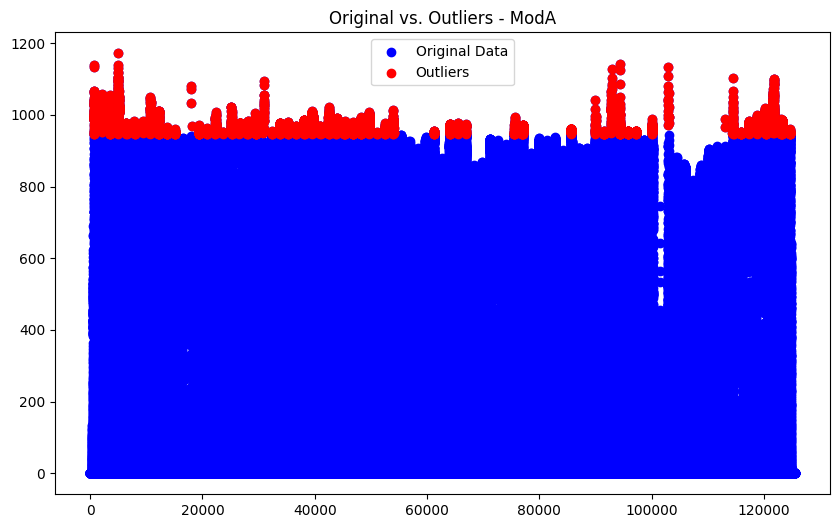

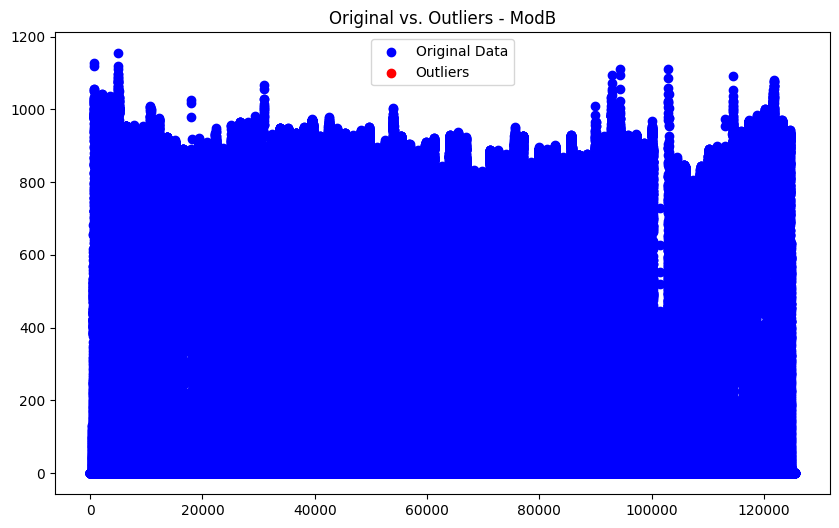

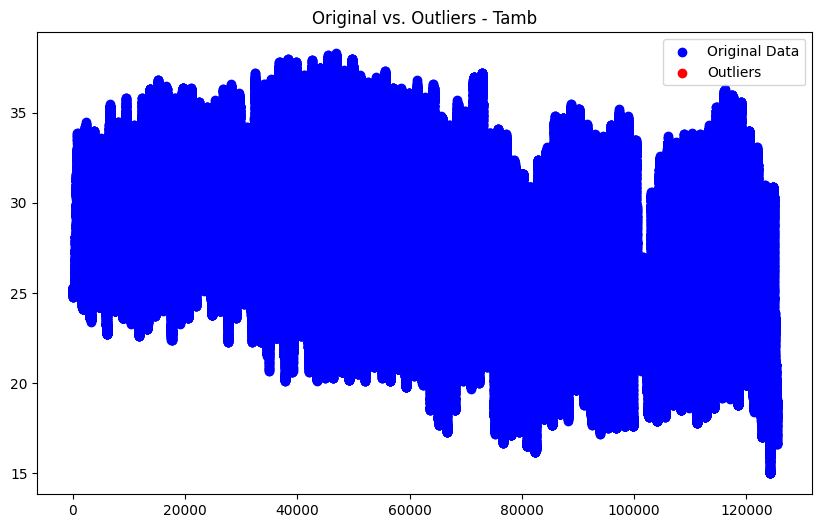

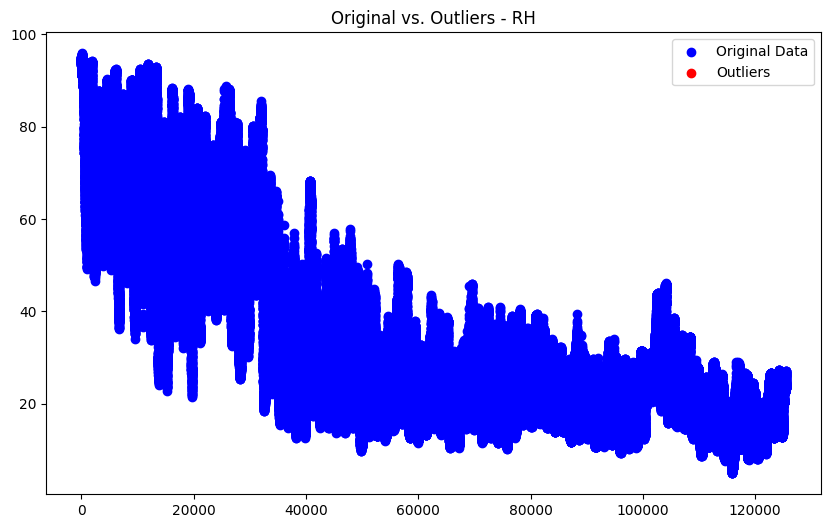

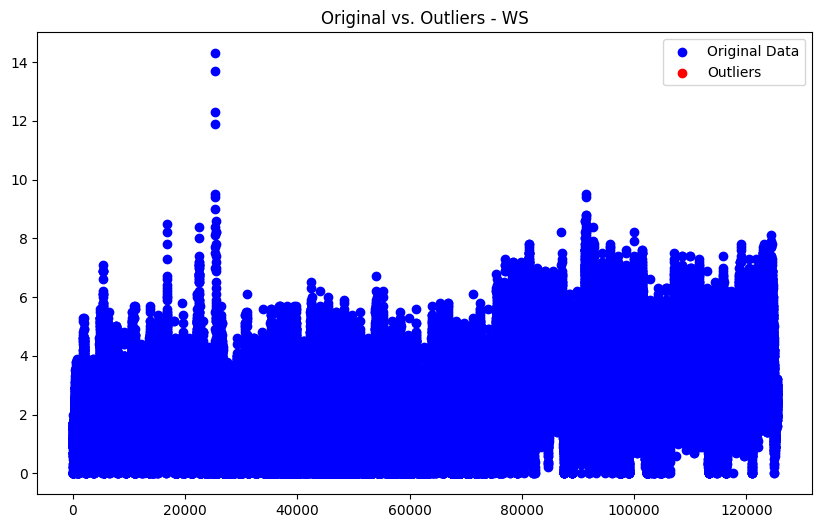

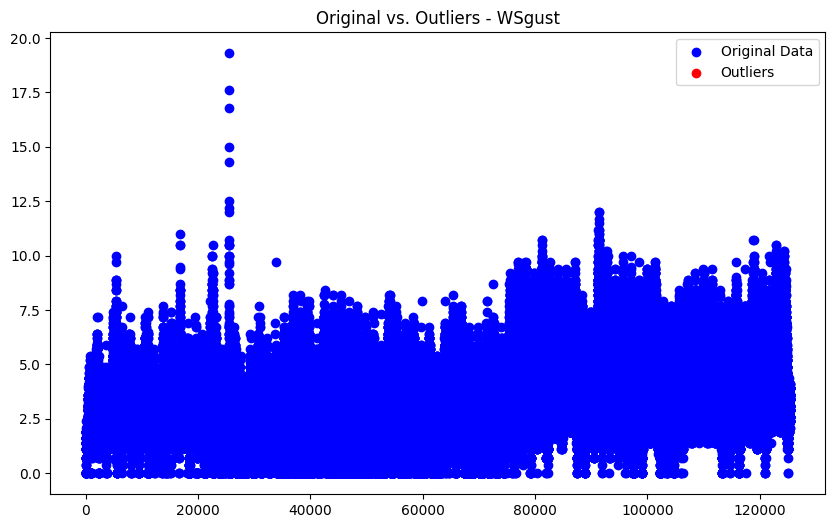

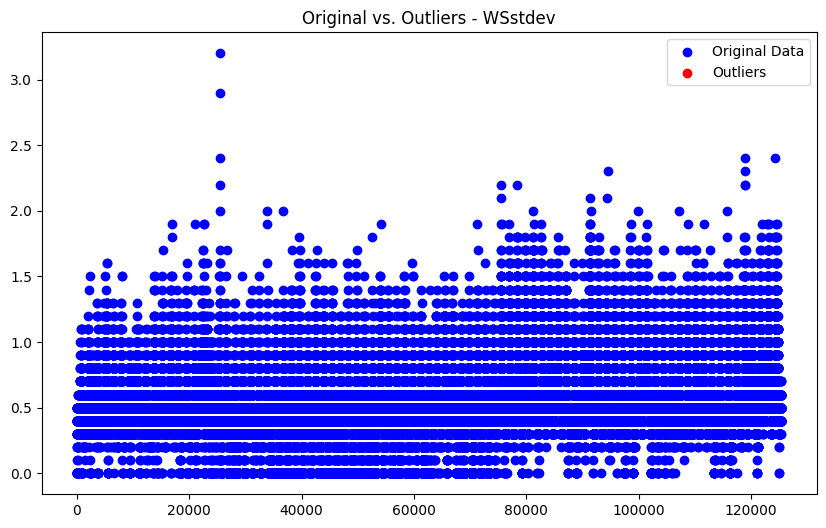

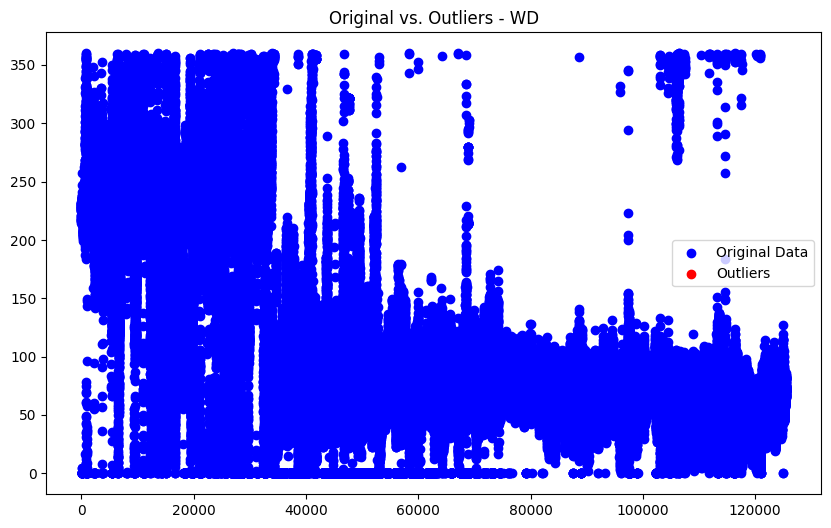

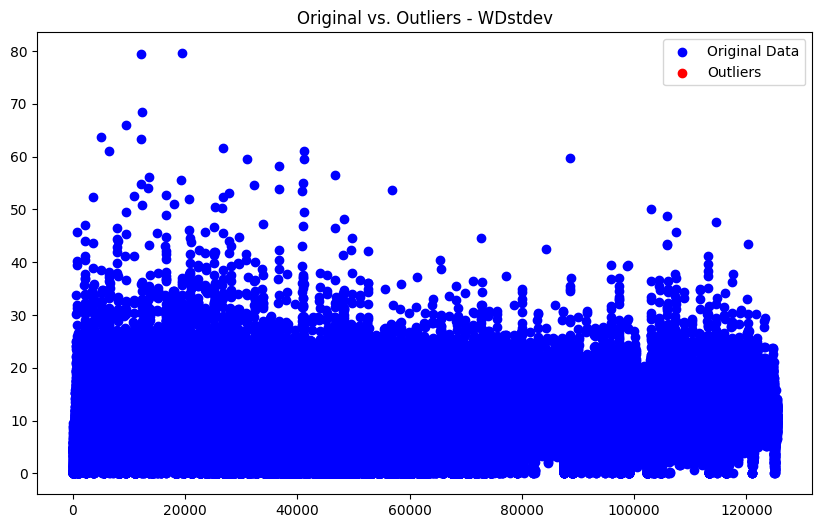

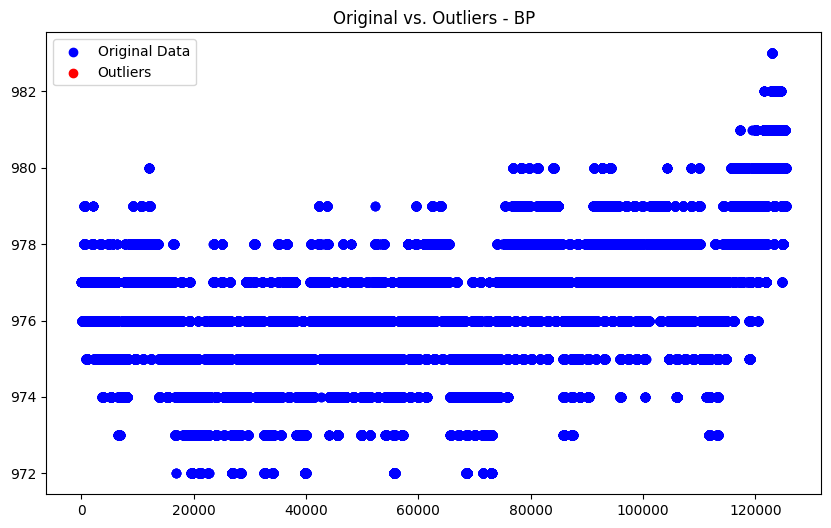

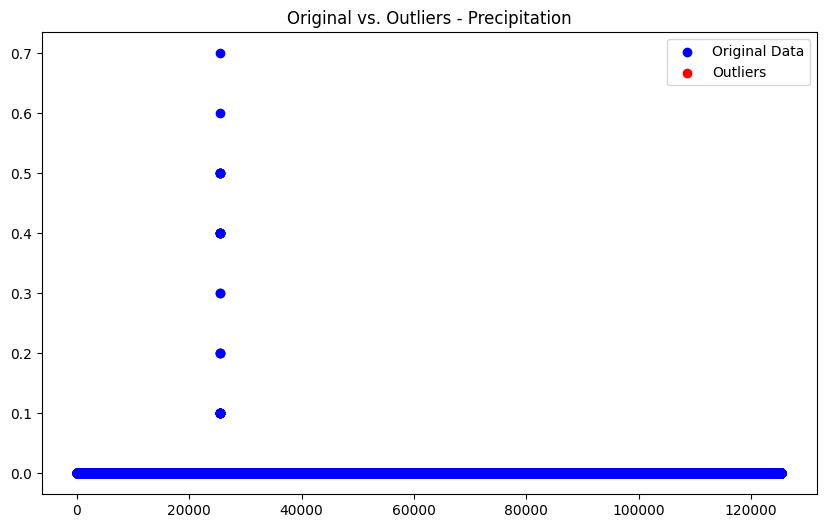

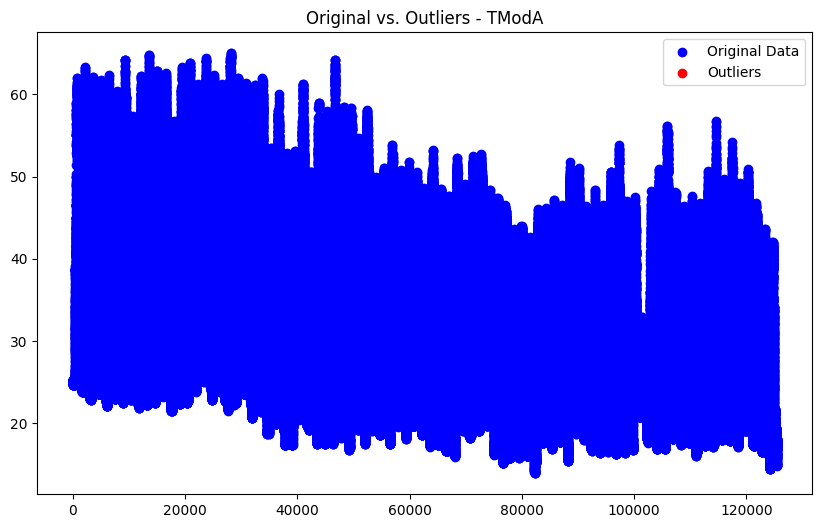

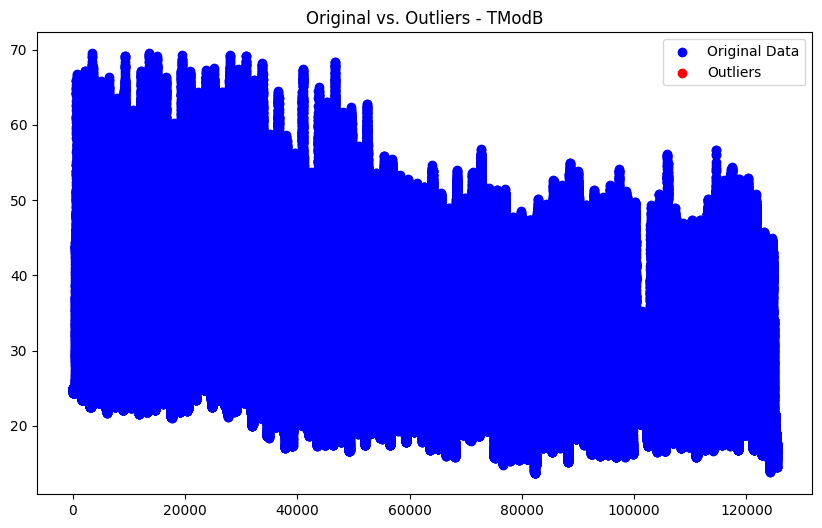

Column: GHI
Original Rows: 125463
Rows After Filtering: 121733
Removed Outliers: 3730

Column: DNI
Original Rows: 125463
Rows After Filtering: 116242
Removed Outliers: 9221

Column: DHI
Original Rows: 125463
Rows After Filtering: 109566
Removed Outliers: 15897

Column: ModA
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: ModB
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: Tamb
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: RH
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: WS
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: WSgust
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: WSstdev
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: WD
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Column: WDstdev
Original Ro

In [5]:
cleaned_data = preprocessed_data.copy()
outlier_check_cols = ['ModA','ModB','WS','WSgust']
num_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA',
       'TModB']
plot_outliers_by_zscore(cleaned_data,num_cols,2)
cleaned_data = remove_outliers_zscore(cleaned_data,num_cols,2,False)
cleaned_data = replace_empty_with_mean(cleaned_data)
cleaned_data.to_csv("../cleaned_data.csv", index=False)
summary_stats = cleaned_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns After Outlier removal:")
print(summary_stats)

                GHI         DNI         DHI       Tamb
Month                                                 
2021-10  103.009653  355.824205  125.982738  27.571731
2021-11  102.385255  373.333625  116.772991  27.555977
2021-12   98.047534  355.004856  122.070674  24.858846
2022-01   99.866613  355.740765  122.811389  24.210698


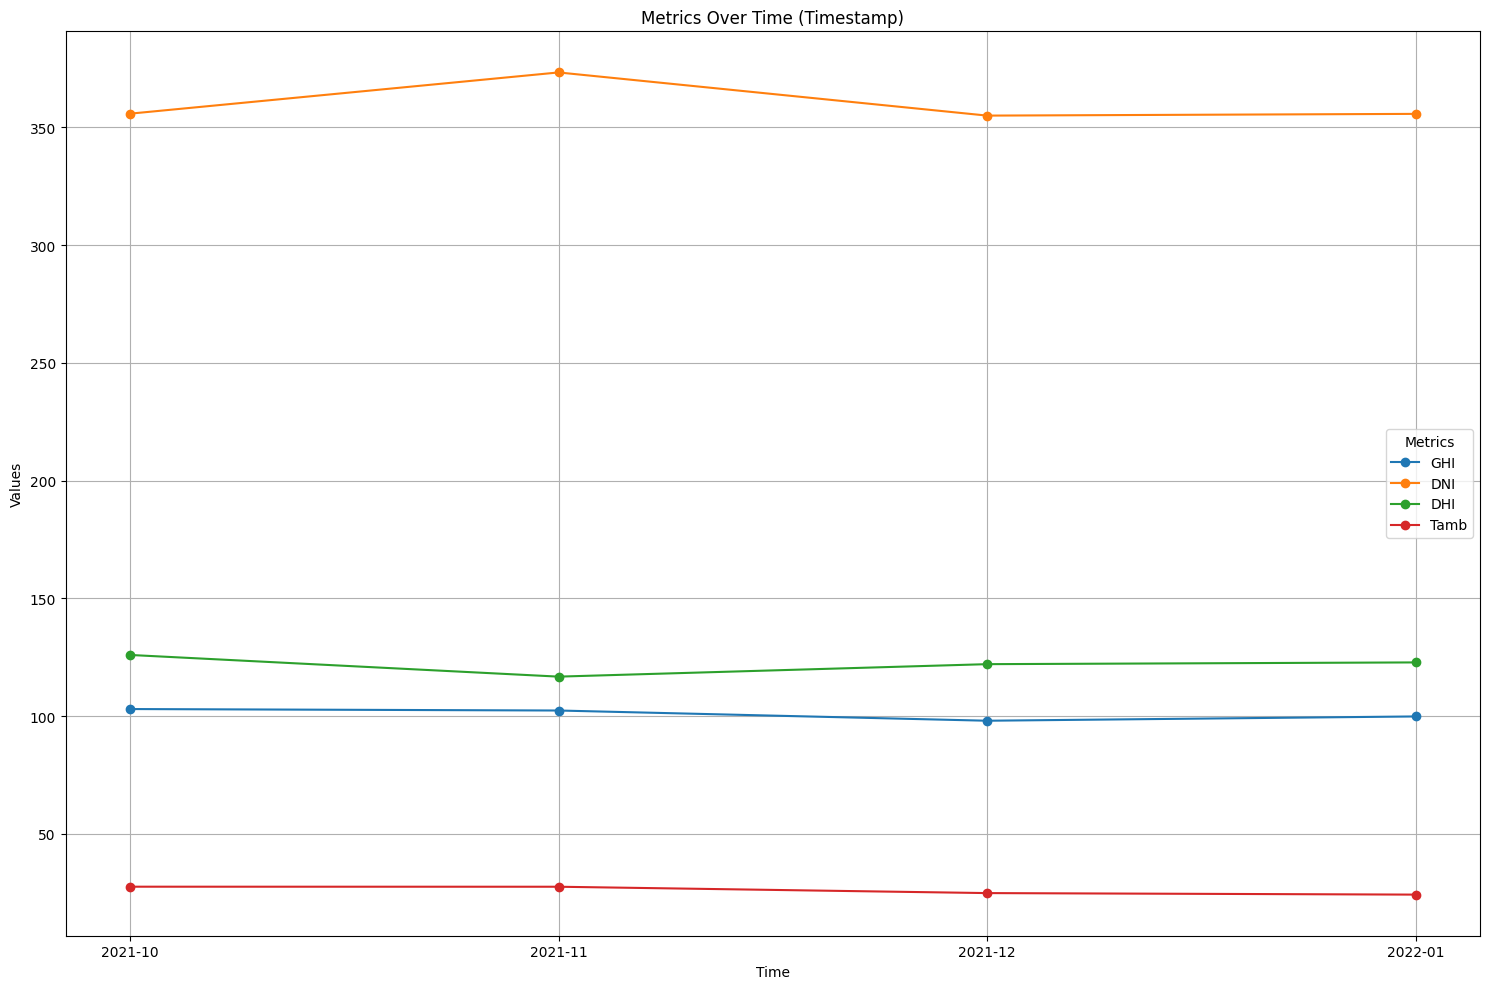

In [6]:
time_column = 'Timestamp'
ghi_metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
sensor_columns = ['ModA', 'ModB']
cleaning_column = 'Cleaning'

plot_time(cleaned_data, time_column, ghi_metrics)

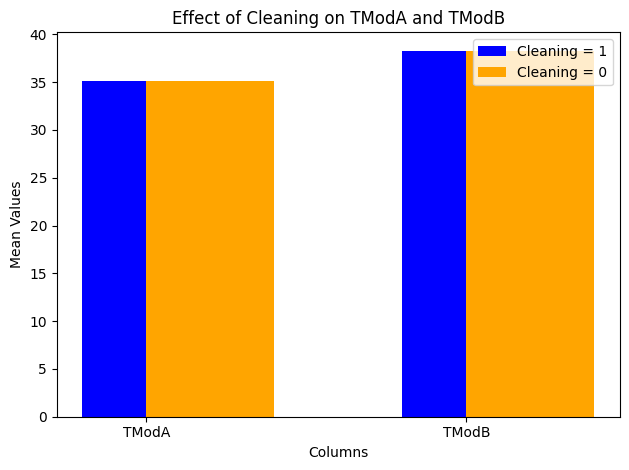

In [7]:
plot_cleaning(cleaned_data)

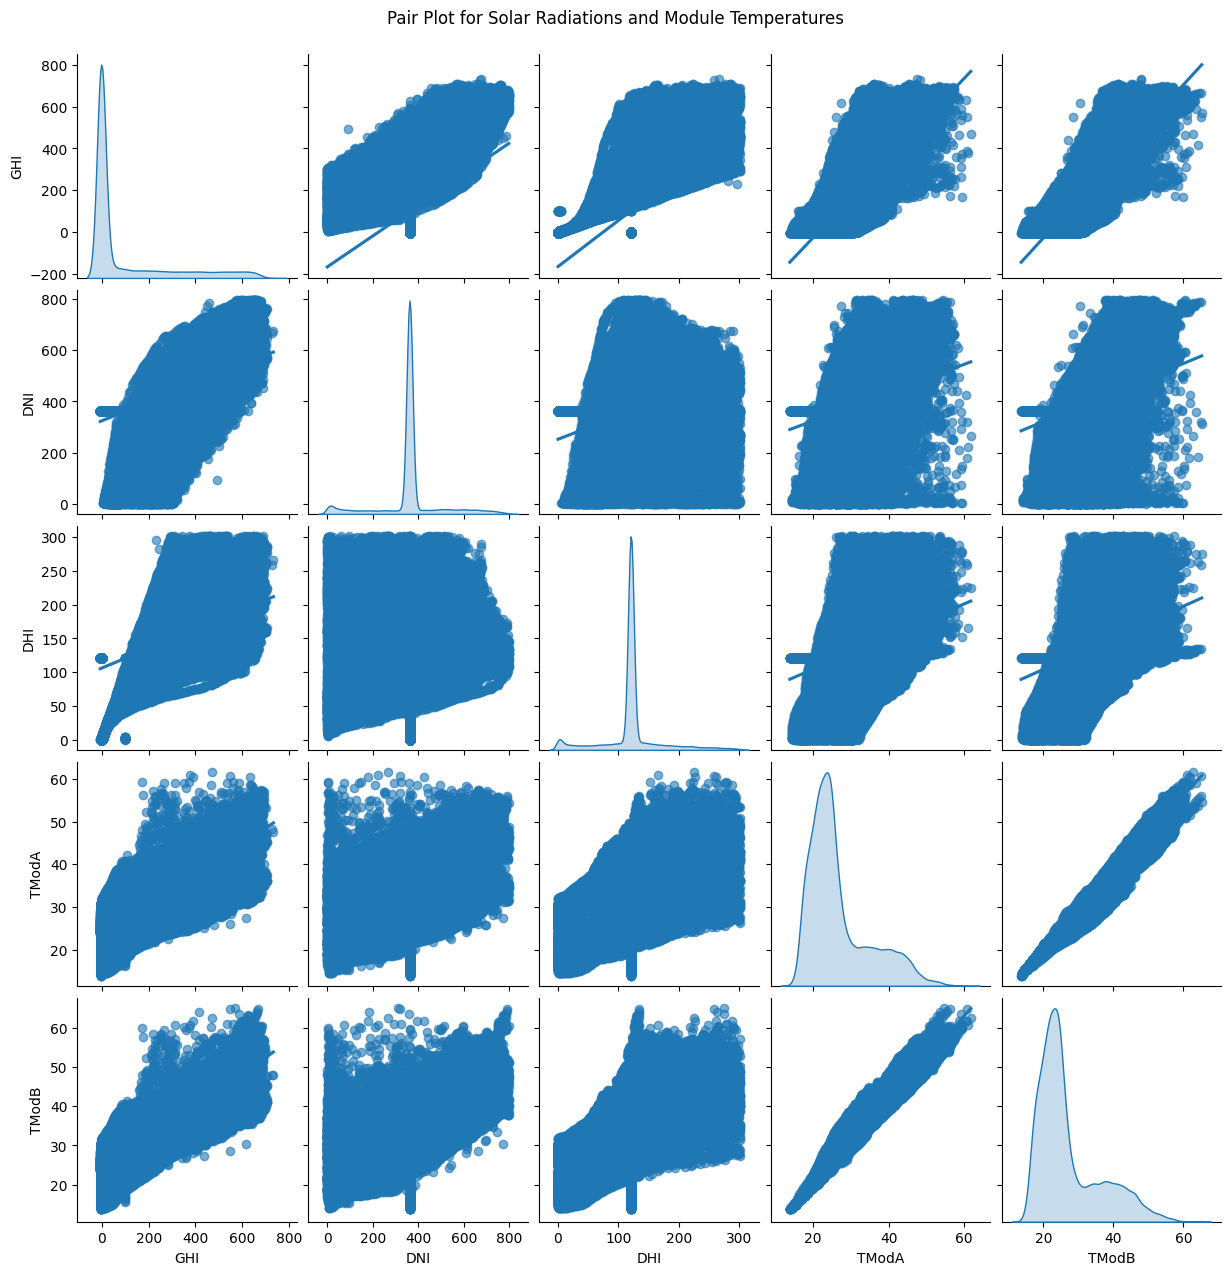

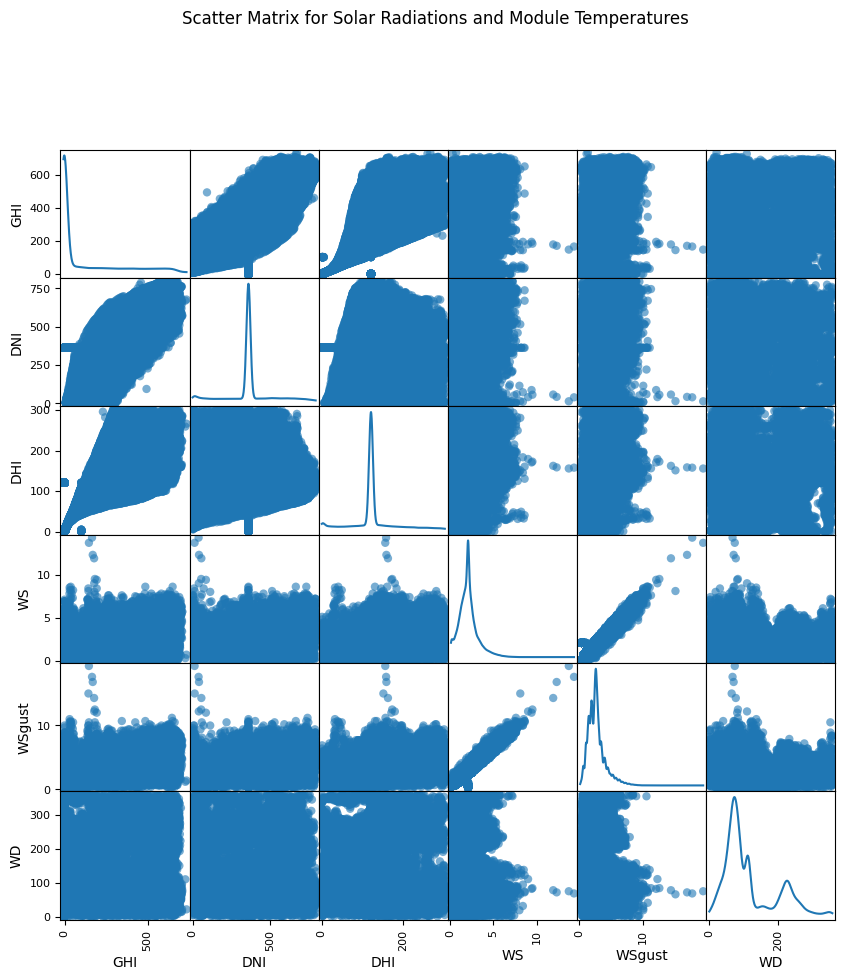

In [8]:
cor_solar_raditation_and_temprature(cleaned_data)
cor_solar_raditation_and_wind_coditions(cleaned_data)

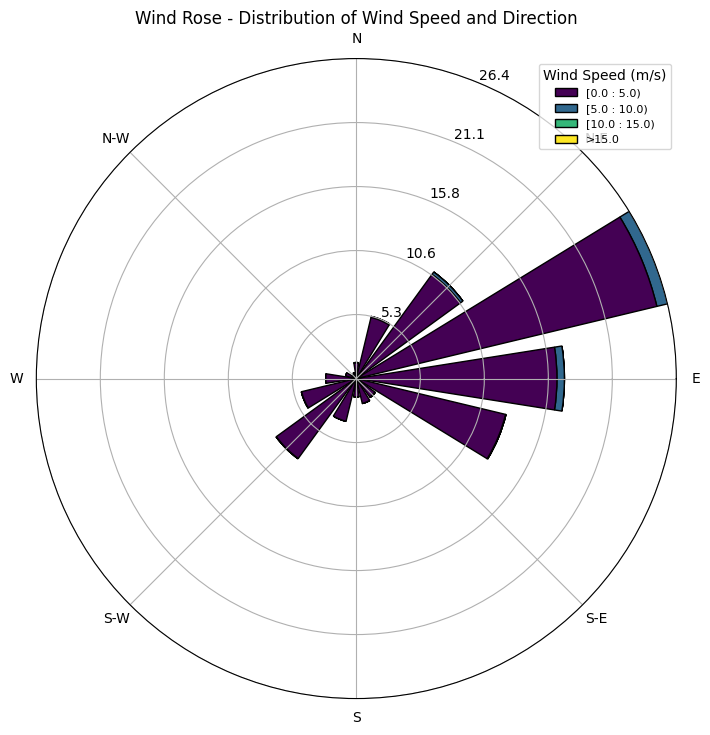

In [9]:
wind_direction_and_speed_analysis(cleaned_data)

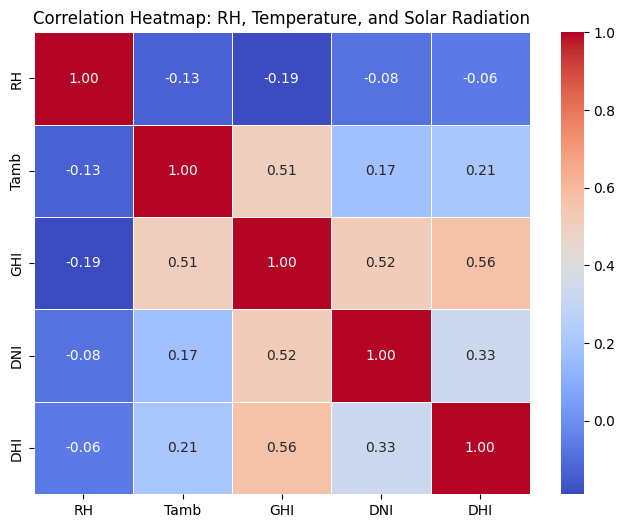

In [10]:
relative_humidity_and_temprature_analysis(cleaned_data)

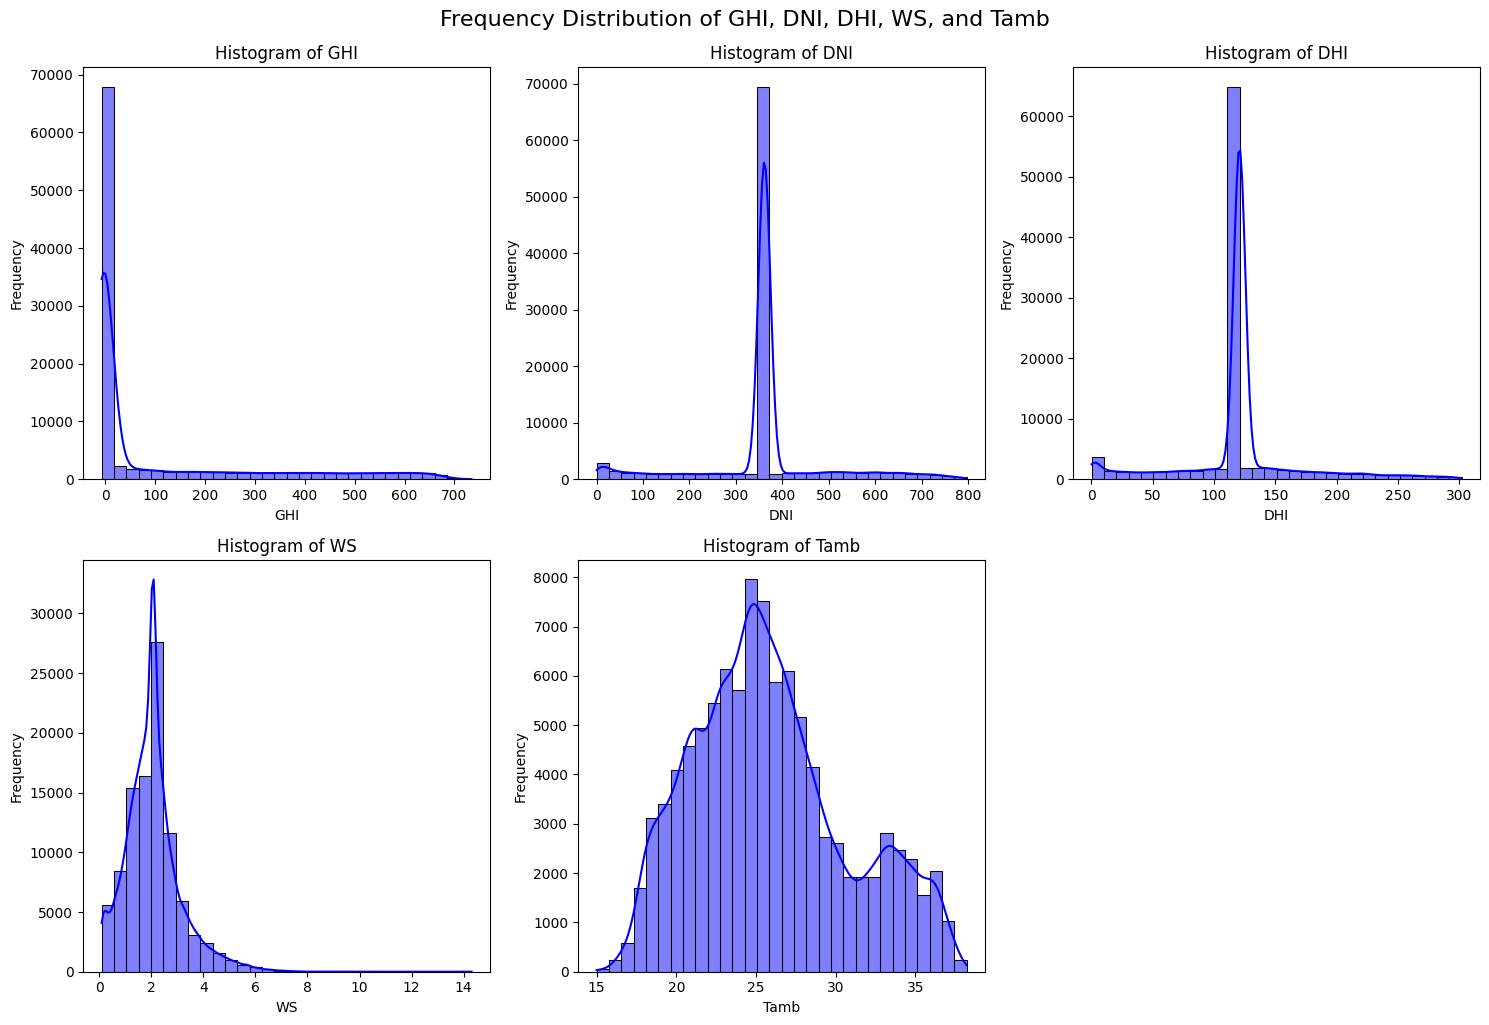

In [11]:
histogram_analysis(cleaned_data)

/workspaces/solar-farm-insights/scripts/bubble_chart_analysis.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('WS_Class').agg({


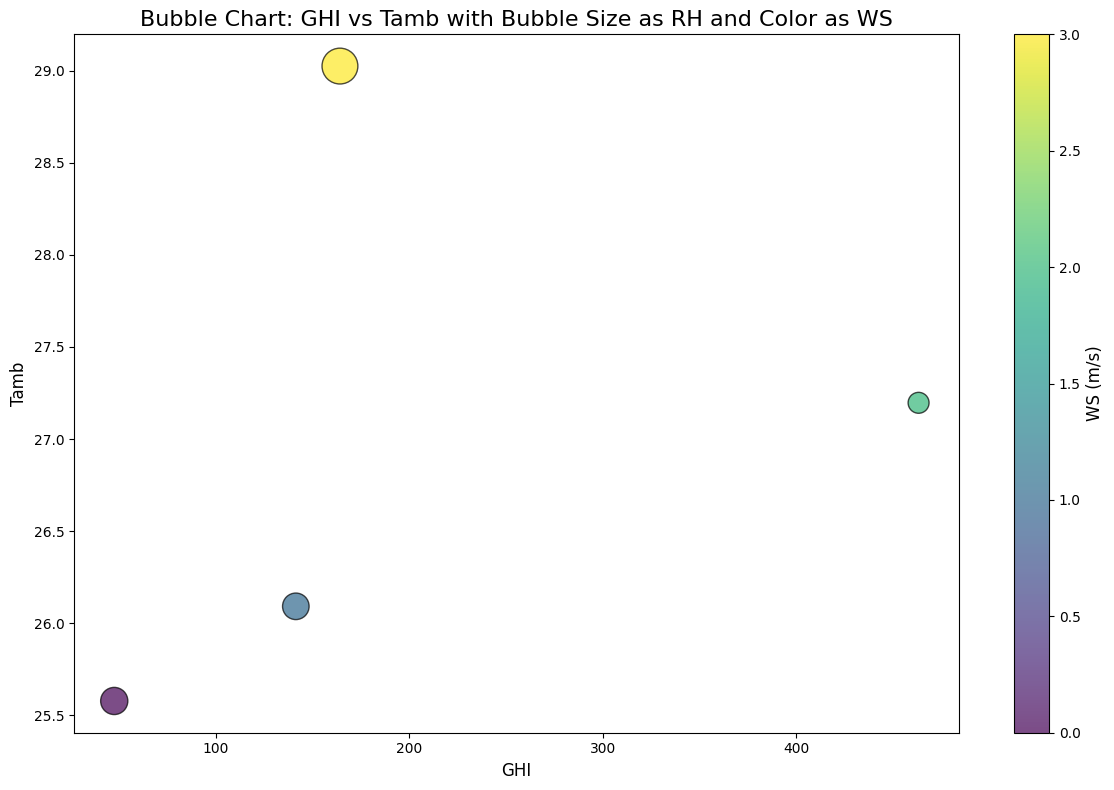

In [12]:
bubble_chart_analysis(cleaned_data)